negative depths imply that's the closest RTA got to the boundary with no breach.
Removing Airspeed * Distance with p-value 0.3437
Removing Airspeed at RTA Engagement with p-value 0.1275
Removing Breach Angles with p-value 0.0505
The graphs indicate that 'Distance from Boundary at Engagement' is the most significant factor, while 'Airspeed at Engagement' seems to have little impact on the likelihood of a breach. After performing the linear regression, it became clear that airspeed and breach angles is not a key determinant in predicting breaches. As a result, the contractors learned that the systems logic needs to be adjusted to increase the distance from the boundary at the point of RTA engagement to reduce the risk of boundary breaches.
                            OLS Regression Results                            
Dep. Variable:             Max Depths   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.122
Method:        

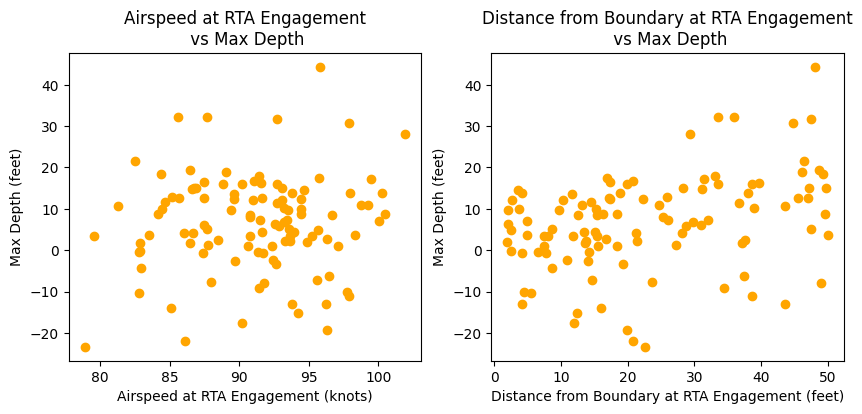

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

df = pd.read_csv('./RTA_adjusted_data.csv')
# Create interaction term
df['Airspeed * Distance'] = df['Airspeed at RTA Engagement'] * df['Distance from Boundary at RTA Engagement']

# Prepare subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=100)
print("negative depths imply that's the closest RTA got to the boundary with no breach.")
axs[0].scatter(df['Airspeed at RTA Engagement'], df['Max Depths'], label='Airspeed at RTA Engagement', color='orange')
axs[0].set_title('Airspeed at RTA Engagement\n vs Max Depth')
axs[0].set_xlabel('Airspeed at RTA Engagement (knots)')
axs[0].set_ylabel('Max Depth (feet)')
#axs[0].legend()

axs[1].scatter(df['Distance from Boundary at RTA Engagement'], df['Max Depths'], label='Distance from Boundary at RTA Engagement', color='orange')
axs[1].set_title('Distance from Boundary at RTA Engagement\n vs Max Depth')
axs[1].set_xlabel('Distance from Boundary at RTA Engagement (feet)')
axs[1].set_ylabel('Max Depth (feet)')
#axs[1].legend()

X = df[['Breach Angles','Airspeed at RTA Engagement','Distance from Boundary at RTA Engagement','Airspeed * Distance']]
y = df['Max Depths']

while True:
    # Add y-int
    X = sm.add_constant(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    # Fit regression model
    model = sm.OLS(y_train, X_train).fit()
    # Get p-values
    pvals = model.pvalues.copy()
    # Remove 'const' 
    pvals = pvals.drop('const', errors='ignore')
    # Check if all remaining p-values are below 0.05
    if all(pvals <= 0.05):
        break  # Stop if no p-values above threshold
    # Find the variable with the highest p-value
    max_pval_var = pvals.idxmax()
    print(f"Removing {max_pval_var} with p-value {pvals[max_pval_var]:.4f}")
    # Drop the variable with the highest p-value from X
    X = X.drop(columns=[max_pval_var])

print("The graphs indicate that 'Distance from Boundary at Engagement' is the most significant factor, while 'Airspeed at Engagement' seems to have little impact on the likelihood of a breach. After performing the linear regression, it became clear that airspeed and breach angles is not a key determinant in predicting breaches. As a result, the contractors learned that the systems logic needs to be adjusted to increase the distance from the boundary at the point of RTA engagement to reduce the risk of boundary breaches.")
print(model.summary())

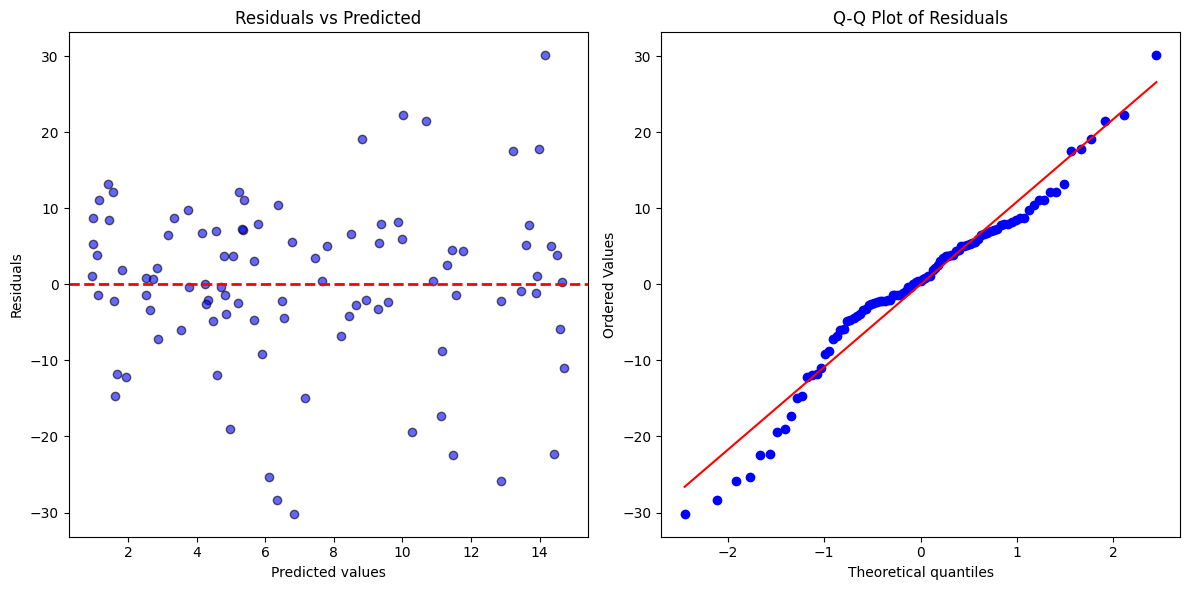

Assumptions of Linearity, Constant Variance, Normality, and Independence Verified


In [11]:
from scipy import stats
#model adequacy
y_pred = model.predict(sm.add_constant(X_train))  # Predicted values for training set
residuals = y_train - y_pred  # Residuals (actual - predicted)

# Plotting residuals
plt.figure(figsize=(12, 6))

# Residual Plot
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, color='blue', edgecolors='k', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

# Show the plots
plt.tight_layout()
plt.show()
print('Assumptions of Linearity, Constant Variance, Normality, and Independence Verified')